In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


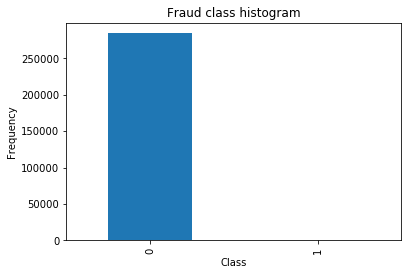

In [6]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
#print count_classes
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [10]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
#data['normAmount'].head()
data = data.drop(['Time','Amount'],1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [55]:
X = data.ix[:,data.columns != 'Class']
y = data.ix[:,data.columns == 'Class']
#x,y

# number of data points in the minority class
number_records_fraud = len(y[y.Class == 1])
#number_records_fraud
fraud_indices = np.array(y[y.Class == 1].index)
#fraud_indices

#picking the indices of the normal classes
normal_indices = data[data.Class == 0].index
#normal_indices

#out of the indices we picked,randomly select x number (number_fraud_indices)
random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace = False)
#random_normal_indices
#len(random_normal_indices)
#random_normal_indices = np.array(random_normal_indices)
#random_normal_indices

#appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
#under_sample_indices[0:5]

#under sample dataset
under_sample_data = data.ix[under_sample_indices,:]
#under_sample_data.tail()
X_undersample = under_sample_data.ix[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:,under_sample_data.columns == 'Class']
#y_undersample

#y_0 = len(under_sample_data[under_sample_data.Class == 0])
#y_total = len(under_sample_data)
#float(y_0) / y_total

#showing ratio 
print 'percentage of normal transactions: %.1f' %(len(under_sample_data[under_sample_data.Class == 0])/float(len(under_sample_data)))
print 'percentage of fraud transactions:',len(under_sample_data[under_sample_data.Class ==1])/float(len(under_sample_data))
print 'total number of transactions in resapmled data:' , len(y_undersample)










percentage of normal transactions: 0.5
percentage of fraud transactions: 0.5
total number of transactions in resapmled data: 984


In [56]:
from sklearn.cross_validation import train_test_split


In [58]:
#whole dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

print 'number transactions train dataset:' , len(X_train)
print 'number transactions test dataset:' , len(X_test)
print 'total number of transactions:' , len(X_train)+len(X_test)

#undersampled dataset 
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=0)



print '-------------'
print 'number transactions train dataset:' , len(X_train_undersample)
print 'number transactions test dataset:' , len(X_test_undersample)
print 'total number of transactions:' , len(X_train_undersample)+len(X_test_undersample)







number transactions train dataset: 199364
number transactions test dataset: 85443
total number of transactions: 284807
-------------
number transactions train dataset: 688
number transactions test dataset: 296
total number of transactions: 984


In [59]:
#recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report


In [62]:
def printing_kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False)
    
    #Different C parameters
    c_param_range = [0.01,0.1,1,10,100]
    
    results_table = pd.DataFrame(index = range(len(c_param_range),2),columns=['C_parameter','mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    #the k-fold will give 2 lists:
    #train_indices = indices[0],
    #test_indices = indices[1]
    j = 0 
    for c_param in c_param_range:
        print '----------------'
        print 'C parameter:',c_param
        print ''
        
        recall_accs = []
        for iteration,indices in enumerate(fold,start=1):
            
            #call the logistic regression model with a certain C-param
            lr = LogisticRegression(C=c_param,penalty='l1')
            
            #ues the training data to fit the model.in this case,
            #we use the portion of the fold to train the model
            #with indices[0].we then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            #predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            
            #calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print 'iteration',iteration,':recall score = ',recall_acc
            
        #the mean value of those recall scores is the metric we want to save and get hold of 
        results_table.ix[j,'mean recall score'] = np.mean(recall_accs)
        j += 1
        print ''
        print 'mean recall score',np.mean(recall_accs)
        print ''
        
    best_c = results_table.ix[results_table['mean recall score'].idxmax()]['C_parameter']
    
    #finally, we can check which c parameter is the best amongst the chosen
    print '*************************'
    print 'best model to choose from cross validation is with c parameter = ',best_c
    print '*************************'
    
    
    return best_c  

In [63]:
best_c = printing_kfold_scores(X_train_undersample,y_train_undersample)

----------------
C parameter: 0.01

iteration 1 :recall score =  0.931506849315
iteration 2 :recall score =  0.917808219178
iteration 3 :recall score =  1.0
iteration 4 :recall score =  0.972972972973
iteration 5 :recall score =  0.954545454545

mean recall score 0.955366699202

----------------
C parameter: 0.1

iteration 1 :recall score =  0.849315068493
iteration 2 :recall score =  0.86301369863
iteration 3 :recall score =  0.932203389831
iteration 4 :recall score =  0.932432432432
iteration 5 :recall score =  0.909090909091

mean recall score 0.897211099695

----------------
C parameter: 1

iteration 1 :recall score =  0.849315068493
iteration 2 :recall score =  0.890410958904
iteration 3 :recall score =  0.966101694915
iteration 4 :recall score =  0.945945945946
iteration 5 :recall score =  0.909090909091

mean recall score 0.91217291547

----------------
C parameter: 10

iteration 1 :recall score =  0.890410958904
iteration 2 :recall score =  0.890410958904
iteration 3 :recall sc

In [80]:
def plot_confusion_matrix(cm,classes,
                          title='Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    this function prints and plots the confusion matrix
    '''
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=  np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    
    thresh = cm.max() / 2.
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color = 'red' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [81]:
import itertools

recall metric in the testing dataset: 0.938775510204
69


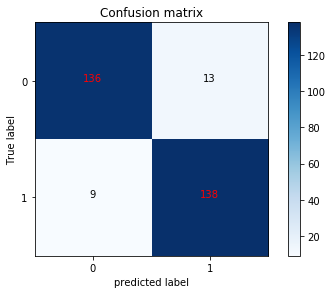

In [82]:
lr = LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

#computer confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print 'recall metric in the testing dataset:',float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])
#print cnf_matrix.shape[0]
#print cnf_matrix.shape[1]
print cnf_matrix.max()/2
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names)
plt.show()

recall metric in the testing dataset: 0.918367346939


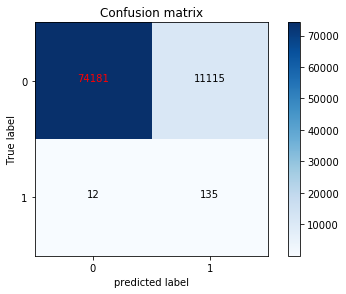

In [83]:
lr = LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

#computer confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print 'recall metric in the testing dataset:',float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])
#print cnf_matrix.shape[0]
#print cnf_matrix.shape[1]
#print cnf_matrix.max()/2
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names)
plt.show()

In [84]:
best_c = printing_kfold_scores(X_train,y_train)

----------------
C parameter: 0.01

iteration 1 :recall score =  0.492537313433
iteration 2 :recall score =  0.602739726027
iteration 3 :recall score =  0.683333333333
iteration 4 :recall score =  0.569230769231
iteration 5 :recall score =  0.45

mean recall score 0.559568228405

----------------
C parameter: 0.1

iteration 1 :recall score =  0.567164179104
iteration 2 :recall score =  0.616438356164
iteration 3 :recall score =  0.683333333333
iteration 4 :recall score =  0.584615384615
iteration 5 :recall score =  0.525

mean recall score 0.595310250644

----------------
C parameter: 1

iteration 1 :recall score =  0.55223880597
iteration 2 :recall score =  0.616438356164
iteration 3 :recall score =  0.716666666667
iteration 4 :recall score =  0.615384615385
iteration 5 :recall score =  0.5625

mean recall score 0.612645688837

----------------
C parameter: 10

iteration 1 :recall score =  0.55223880597
iteration 2 :recall score =  0.616438356164
iteration 3 :recall score =  0.7333333

recall metric in the testing dataset: 0.619047619048


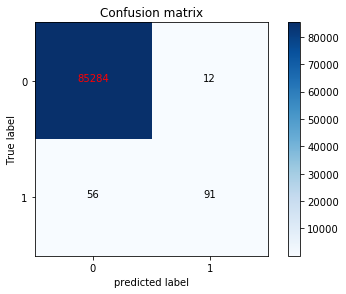

In [85]:
lr = LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)

#computer confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print 'recall metric in the testing dataset:',float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])
#print cnf_matrix.shape[0]
#print cnf_matrix.shape[1]
#print cnf_matrix.max()/2
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names)
plt.show()

('Recall metric in the testing dataset: ', 1.0)
('Recall metric in the testing dataset: ', 1.0)
('Recall metric in the testing dataset: ', 1.0)
('Recall metric in the testing dataset: ', 0.9727891156462585)
('Recall metric in the testing dataset: ', 0.9387755102040817)
('Recall metric in the testing dataset: ', 0.891156462585034)
('Recall metric in the testing dataset: ', 0.8299319727891157)
('Recall metric in the testing dataset: ', 0.782312925170068)
('Recall metric in the testing dataset: ', 0.5986394557823129)


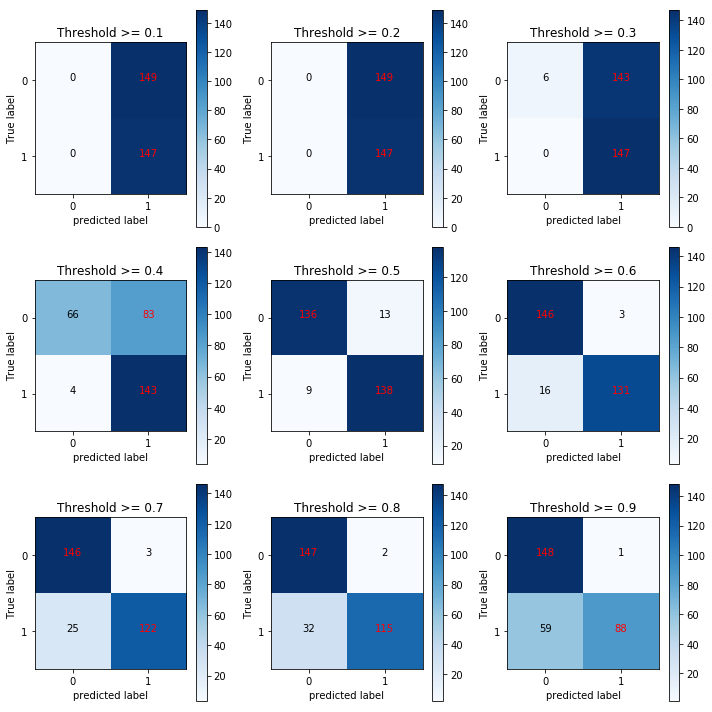

In [86]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
    
    
    
    
    